# Data Preparation

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load campaign data
df = pd.read_excel('marketing_campaign_v2.xlsx')

In [ ]:
# Print Head
df.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,dummy,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response_actual,Complain
0,6663,1940,84,PhD,Single,51141.0,0,0,2013-07-08,2024-01-01,...,1,4,5,0,0,0,0,0,0,0
1,6932,1941,83,PhD,Married,93027.0,0,0,2013-04-13,2024-01-01,...,10,5,2,0,0,1,0,0,1,0
2,2968,1943,81,PhD,Divorced,48948.0,0,0,2013-02-01,2024-01-01,...,10,5,6,1,0,0,0,0,1,0
3,8800,1943,81,PhD,Divorced,48948.0,0,0,2013-02-01,2024-01-01,...,10,5,6,1,0,0,0,0,1,0
4,1453,1943,81,PhD,Widow,57513.0,0,0,2013-07-06,2024-01-01,...,3,13,6,0,0,0,0,0,0,0


In [ ]:
# Check for null data
df.isnull().sum()

ID                      0
Year_Birth              0
Age                     0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
dummy                   0
Years_with_Brand        0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response_actual         0
Complain                0
dtype: int64

In [ ]:
# Fill the null values with mean for Income column
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [ ]:
# Create age variable from year of birth
df['Age'] = 2024 - df['Year_Birth']  # Assuming current year is 2024

In [ ]:
# Verify null values again
df.isnull().sum()

ID                     0
Year_Birth             0
Age                    0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
dummy                  0
Years_with_Brand       0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response_actual        0
Complain               0
dtype: int64

# Exploratory Data Analysis

In [ ]:
# Percentage of people educated by category
x=df.Education.value_counts()
fig=px.pie(df,values=x,names=x.index,title='Education')
fig.show()

In [ ]:
# Relationship status
x=df.Marital_Status.value_counts()
fig=px.pie(df,values=x,names=x.index,title='Martial Status')
fig.show()

In [ ]:
# Response rate by age group
fig = px.histogram(df, x="Age", color="Response_actual")
fig.update_layout(title="Response Rate by Age Group")
fig.show()

In [ ]:
# Purchase frequency by income level
fig = px.box(df, y="Income", x="NumStorePurchases")
fig.update_layout(title="Purchase Frequency by Income")
fig.show()

# Prediction Model #1
  ### *Logistic Regression predicting Response Rate*

In [ ]:
# Logistic regression to predict response rate with significant factors and coefficients
X = df[['Age', 'Income', 'Kidhome', 'Teenhome','Years_with_Brand','Recency','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth','Complain']]
X = X.fillna(X.mean())
y = df['Response_actual']

model = LogisticRegression()
model.fit(X, y)

print('Predicted response rate:', model.predict(X).mean())

Predicted response rate: 0.05143112701252236


In [ ]:
# Print important coefficients

pd.DataFrame({'coeff': model.coef_[0]}, index=X.columns)

,coeff
Age,-0.010995
Income,0.000014
Kidhome,-0.031389
Teenhome,-0.013123
Years_with_Brand,-0.163033
Recency,-0.002823
NumDealsPurchases,-0.062676
NumWebPurchases,0.079253
NumCatalogPurchases,0.140966
NumStorePurchases,-0.012369


In [ ]:
# Print overall model performance
y_pred = model.predict(X)
print(f'Accuracy: {accuracy_score(y, y_pred):.4f}')
print(f'F1 Score: {f1_score(y, y_pred):.4f}')
print(f'Confusion Matrix:\n{confusion_matrix(y, y_pred)}')

Accuracy: 0.8010
F1 Score: 0.2288
Confusion Matrix:
[[1725   49]
 [ 396   66]]


In [ ]:
# Response prediction model performance using cross-validation
from sklearn.model_selection import cross_validate
scores = cross_validate(model, X, y, scoring=['accuracy', 'precision', 'recall', 'f1'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# Print average scores
print('Average Cross Validation Scores:')
print(f'Accuracy: {scores["test_accuracy"].mean():.4f}')
print(f'Precision: {scores["test_precision"].mean():.4f}')
print(f'Recall: {scores["test_recall"].mean():.4f}')
print(f'F1 Score: {scores["test_f1"].mean():.4f}')

Average Cross Validation Scores:
Accuracy: 0.7961
Precision: 0.4344
Recall: 0.1624
F1 Score: 0.2298


# Prediction Model #2
  ### Logistic Regression predicting average number of campaigns needed till conversion

In [ ]:
# Prediction Model: Campaign Conversions

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df[['Age', 'Kidhome', 'Teenhome','Years_with_Brand','NumDealsPurchases','NumWebPurchases',
        'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth']]
X = X.fillna(X.mean())
X_scaled = scaler.fit_transform(X)
y = df['Response_actual']

# Re-train the model with scaled features
model.fit(X_scaled, y)

model = LogisticRegression()
model.fit(X, y)
print('Expected campaigns till conversion:', 1/model.predict_proba(X)[:,1].mean())

Expected campaigns till conversion: 4.8455001281146854


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# Predict conversion probability for each customer on an average
y_proba = model.predict_proba(X)[:, 1]  # Probability of responding (positive class)
print(y_proba.mean())

0.2063770454153482


In [ ]:
# Print overall model performance
y_pred = model.predict(X)
print(f'Accuracy: {accuracy_score(y, y_pred):.4f}')
print(f'F1 Score: {f1_score(y, y_pred):.4f}')
print(f'Confusion Matrix:\n{confusion_matrix(y, y_pred)}')

Accuracy: 0.7947
F1 Score: 0.2388
Confusion Matrix:
[[1705   69]
 [ 390   72]]


# Clustering Model

In [ ]:
# Cluster customers
kmeans = KMeans(n_clusters=5).fit(X)
df['segment'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Average expected campaigns till conversion for each cluster
df['expected_conversions'] = 1 / y_proba
print(df.groupby('segment')['expected_conversions'].mean())

segment
0     4.528009
1    11.000392
2     6.895279
3     6.958659
4     8.030390
Name: expected_conversions, dtype: float64


In [ ]:
# Average probability of conversions for each cluster
df['conversion_probability'] = y_proba
print(df.groupby('segment')['conversion_probability'].mean())

segment
0    0.308650
1    0.105854
2    0.206103
3    0.244661
4    0.202982
Name: conversion_probability, dtype: float64


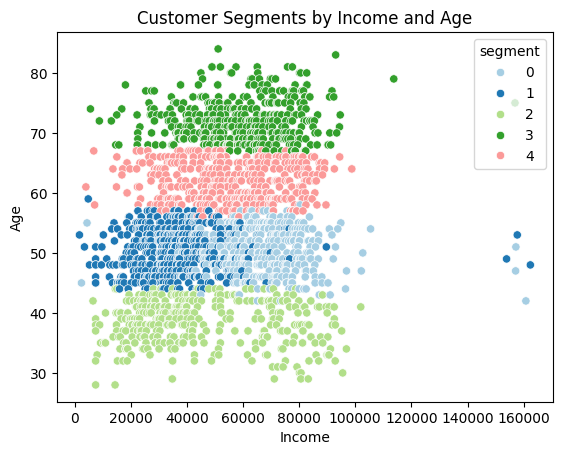

In [ ]:
# Cluster visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    x="Income",
    y="Age",
    hue="segment",
    palette="Paired",
    data=df,
)
plt.title('Customer Segments by Income and Age')
plt.show()


In [ ]:
# Applying Random Forest as Logistic Regression cannot handle all features to identify cluster-wise segmentation

from sklearn.ensemble import RandomForestClassifier

# Loop through clusters and build models
cluster_models = {}
for cluster in df['segment'].unique():
  cluster_data = df[df['segment'] == cluster]
  X_cluster = cluster_data[['Age', 'Income', 'NumCatalogPurchases']]  # Assuming these features
  y_cluster = cluster_data['Response_actual']

  # Create and fit a Random Forest model
  model = RandomForestClassifier()
  model.fit(X_cluster, y_cluster)

  # Store the model for the current cluster
  cluster_models[cluster] = model

# for example, print feature importances for cluster 1 model:
print(cluster_models[1].feature_importances_)

# Predicting with Cluster Models (assuming new data with cluster assignments)
new_data = pd.DataFrame({'Age': [85], 'Income': [80000], 'NumCatalogPurchases': [10]})  # Example data
cluster = 1  # Assuming assigned cluster

# Use the model for the assigned cluster to predict
predicted_response = cluster_models[cluster].predict(new_data)[0]

print(f"Predicted response for new data (cluster {cluster}): {predicted_response}")

[0.24596548 0.55936704 0.19466748]
Predicted response for new data (cluster 1): 1
